In [1]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load data

In [4]:
titanic_data=pd.read_csv('titanic_train.csv')

In [5]:
len(titanic_data)

891

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#check for null values

In [8]:
titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#check how many values are null

In [10]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#visualize null values using heatmap

<Axes: >

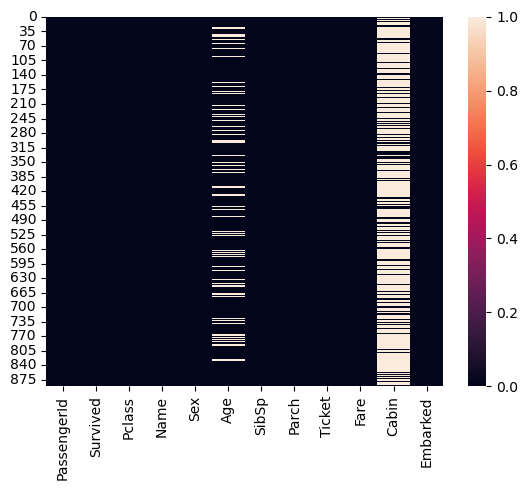

In [12]:
sns.heatmap(titanic_data.isna())

In [13]:
#find the percentage of null values in the age column (to discard or fill)

In [14]:
titanic_data['Age'].isna().sum()/len(titanic_data['Age'])*100

19.865319865319865

In [15]:
#the percentage of null values is not up to 25%, so i'll fill 

In [16]:
#to find the distribution for the age column using ditribution plot (displot)

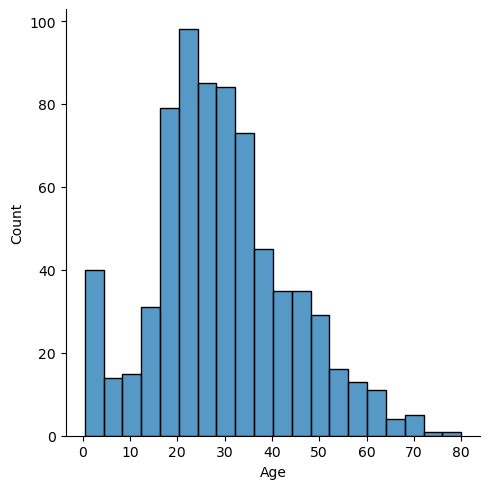

In [17]:
sns.displot(x='Age', data=titanic_data)

In [18]:
#find the mean age

In [19]:
titanic_data['Age'].mean()

29.69911764705882

In [20]:
#fill the missing values in the age column with the mean age

In [21]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [22]:
#verify that there's no null value in age

In [23]:
titanic_data['Age'].isna().sum()

0

In [24]:
#using heatmap

<Axes: >

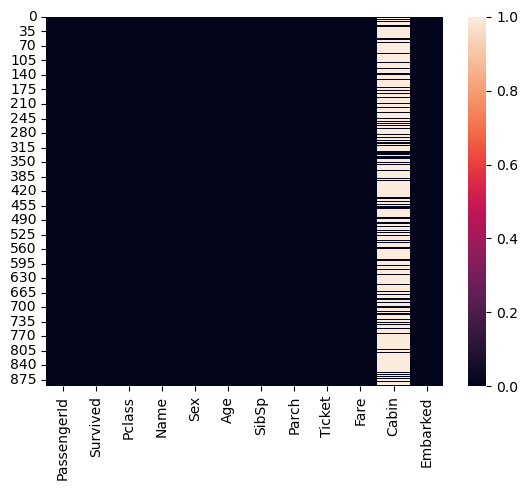

In [25]:
sns.heatmap(titanic_data.isna())

In [26]:
#find the percentage of null values in the cabin column (to discard or fill)

In [27]:
titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin'])*100

77.10437710437711

In [28]:
#the percentage of null values in the cabin column is too high, so I'm gonna drop it

In [29]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [30]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [33]:
#convert sex column to numerical representations

In [34]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [35]:
#create a new column for gender

In [36]:
titanic_data['Gender']=gender

In [37]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [38]:
titanic_data.head() #note 1 is male and 0 is female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [39]:
#drop columns that are not required. i.e. object columns or non-numerical columns

In [40]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'], axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


<Axes: xlabel='Survived', ylabel='count'>

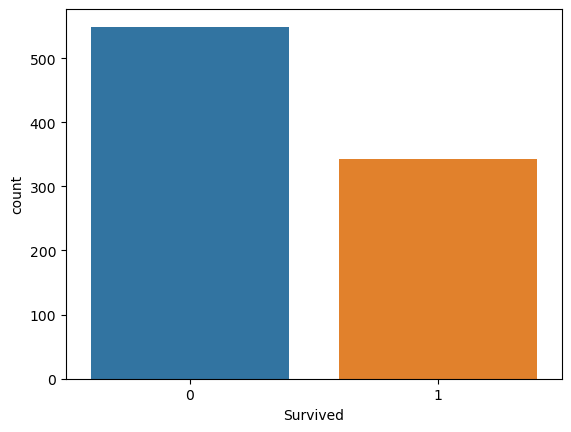

In [41]:
sns.countplot(x='Survived', data=titanic_data)

In [42]:
#note that 0 is no (did not survive) and 1 is yes (survived)

<Axes: xlabel='Survived', ylabel='count'>

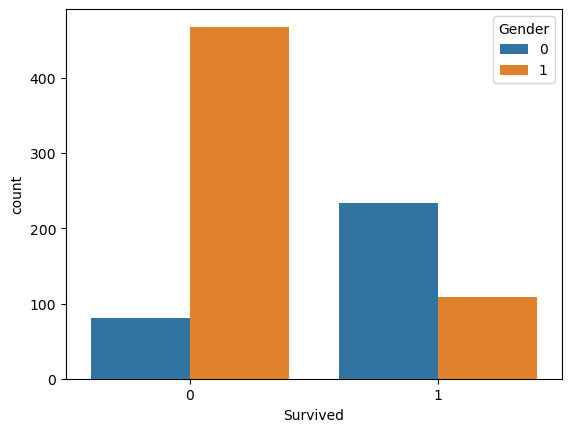

In [43]:
sns.countplot(x='Survived', data=titanic_data, hue='Gender') #0 is female and 1 is male, hue is used for color encoding

<Axes: xlabel='Survived', ylabel='Age'>

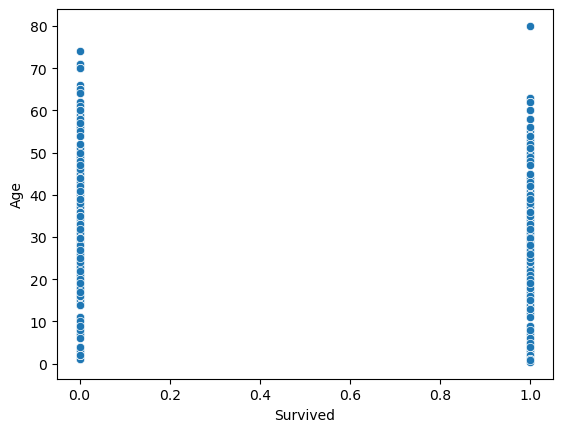

In [44]:
sns.scatterplot(x=titanic_data['Survived'], y=titanic_data['Age'])

<Axes: xlabel='Survived', ylabel='Pclass'>

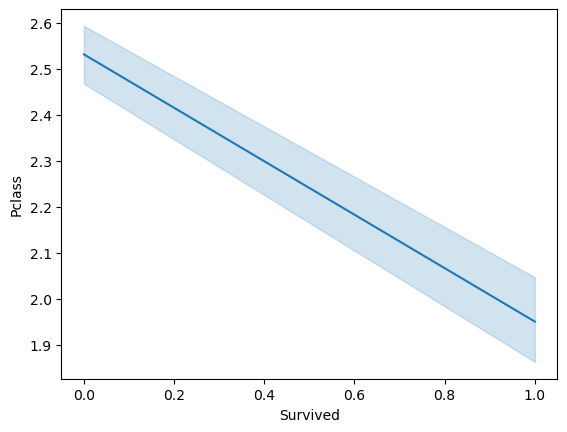

In [45]:
sns.lineplot(x=titanic_data['Survived'], y=titanic_data['Pclass'])

<Axes: xlabel='Survived', ylabel='Age'>

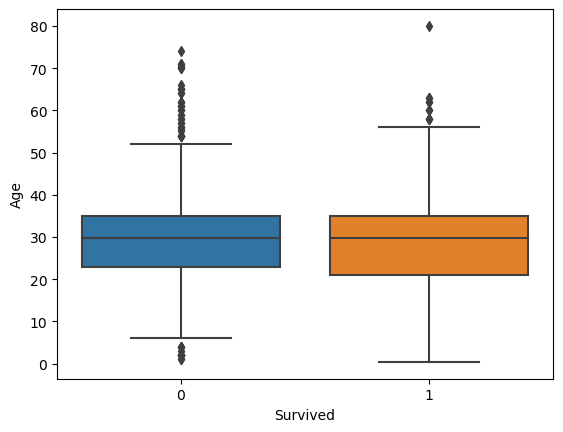

In [46]:
sns.boxplot(x=titanic_data['Survived'],y=titanic_data['Age'])

C:\Users\RevdNiyiDahunsi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\RevdNiyiDahunsi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='Survived'>

C:\Users\RevdNiyiDahunsi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\RevdNiyiDahunsi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


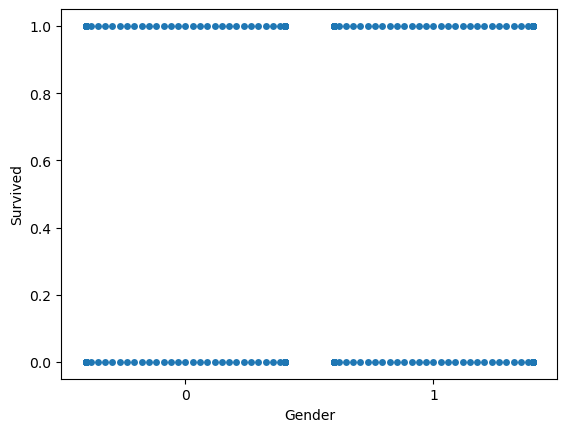

In [47]:
sns.swarmplot(x=titanic_data['Gender'],y=titanic_data['Survived'])

<Axes: xlabel='Gender', ylabel='Survived'>

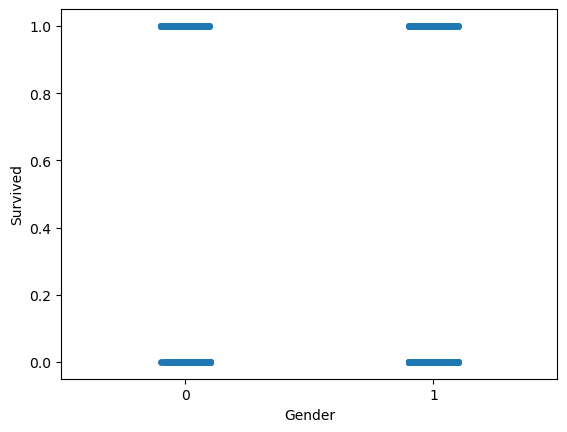

In [48]:
sns.stripplot(x=titanic_data['Gender'],y=titanic_data['Survived'])

<Axes: xlabel='Survived'>

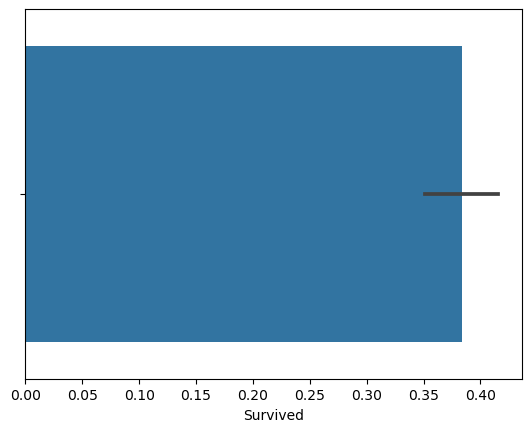

In [49]:
sns.barplot(x=titanic_data['Survived'])

<Axes: xlabel='Age'>

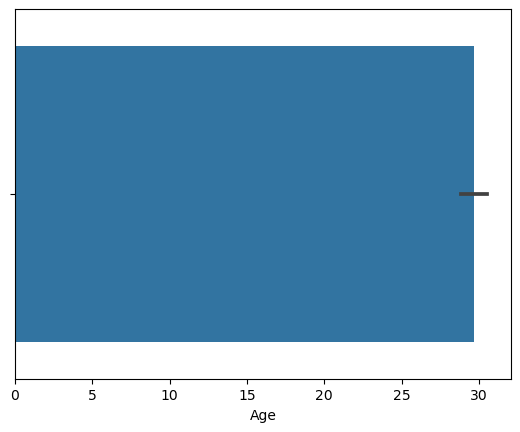

In [50]:
sns.barplot(x=titanic_data['Age'])#central tendency (mean age?)

<Axes: xlabel='Gender', ylabel='Survived'>

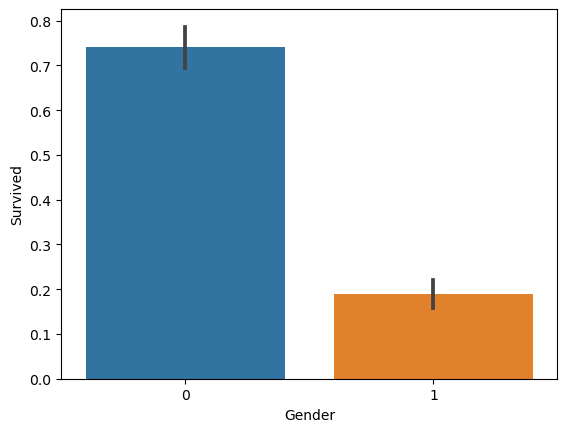

In [51]:
sns.barplot(x=titanic_data['Gender'],y=titanic_data['Survived'])#0=female, 1=male

In [52]:
#more female assengers survived than male

<Axes: xlabel='Survived', ylabel='Age'>

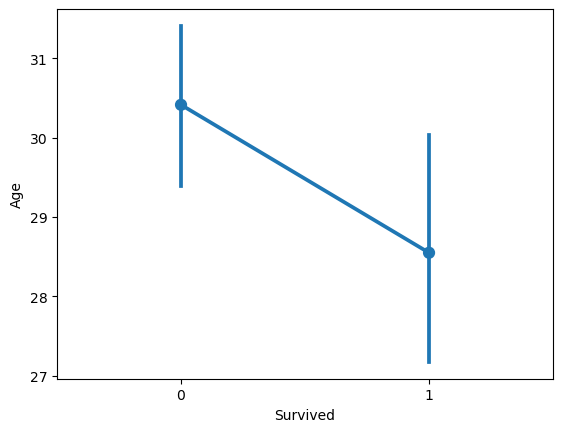

In [53]:
sns.pointplot(x=titanic_data['Survived'],y=titanic_data['Age'])

<Axes: xlabel='Pclass', ylabel='count'>

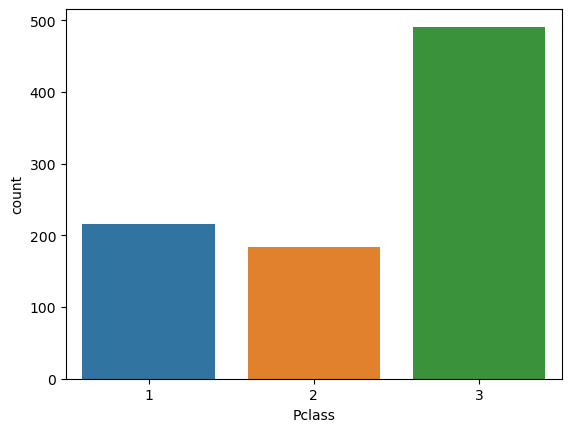

In [54]:
sns.countplot(x=titanic_data['Pclass'])

In [55]:
#more passengers were in the 3rd socio-economic class

<Axes: xlabel='Age', ylabel='Survived'>

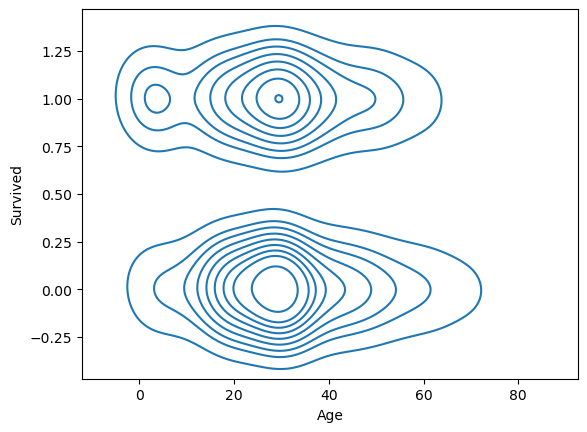

In [56]:
sns.kdeplot(x=titanic_data['Age'],y=titanic_data['Survived'])

In [57]:
#separate Dependent and Independent Variables

In [59]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

In [62]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [63]:
#import train test split model

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr=LogisticRegression()

In [69]:
lr.fit(x_train,y_train)

C:\Users\RevdNiyiDahunsi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
predict=lr.predict(x_test)

In [71]:
#testing the data

In [72]:
from sklearn.metrics import confusion_matrix

In [75]:
pd.DataFrame(confusion_matrix(y_test, predict), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,38,82


In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295

